# Linear Regression for all the 3 stocks based on User selection.


The data taken here is a complete set with tweet info

In [1]:
import pandas_datareader as pdr
import pandas as pd 
import datetime
import pandas_ta

In [2]:
#!pip install pandas_ta

In [3]:
print ("Enter one of these values from doge / tesla/ twitter")
selected_value = input()

Enter one of these values from doge / tesla/ twitter
twitter


In [4]:
# Database related all the code is moved to this file
%run -i "SqlConn.py"
#importing local py file
import SqlConn 

In [5]:
#Fetch Tweets and Sentiment data - Join from Tweet and Sentiment tables
try:
    df_Stock = SqlConn.fetchFinanceData(selected_value)
    print("Data transfer Done")
except BaseException as err:
    print(err)


Data transfer Done


In [6]:
selected_value

'twitter'

In [7]:
df_Stock

,financeType,date,open,high,low,close,adjustedClose,volume,id
0,twitter,2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701600,3031
1,twitter,2013-11-08,45.930000,46.939999,40.689999,41.650002,41.650002,27925300,3032
2,twitter,2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113900,3033
3,twitter,2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316700,3034
4,twitter,2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688300,3035
...,...,...,...,...,...,...,...,...,...
2178,twitter,2022-07-06,38.209999,38.450001,37.740002,38.209999,38.209999,4870300,5209
2179,twitter,2022-07-07,38.320000,39.509998,38.320000,38.790001,38.790001,13214900,5210
2180,twitter,2022-07-08,37.509998,37.549999,36.799999,36.810001,36.810001,26156700,5211
2181,twitter,2022-07-11,34.599998,34.900002,32.549999,32.650002,32.650002,67071300,5212


In [8]:
df_Stock["date"] = pd.to_datetime(df_Stock["date"])
df_Stock.set_index("date", inplace=True)
df_Stock.drop("financeType",axis=1,inplace=True)
df_Stock

,open,high,low,close,adjustedClose,volume,id
date,,,,,,,
2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701600,3031
2013-11-08,45.930000,46.939999,40.689999,41.650002,41.650002,27925300,3032
2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113900,3033
2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316700,3034
2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688300,3035
...,...,...,...,...,...,...,...
2022-07-06,38.209999,38.450001,37.740002,38.209999,38.209999,4870300,5209
2022-07-07,38.320000,39.509998,38.320000,38.790001,38.790001,13214900,5210
2022-07-08,37.509998,37.549999,36.799999,36.810001,36.810001,26156700,5211


In [9]:
df_AdjustedClose = df_Stock[['adjustedClose']]


In [10]:
df_AdjustedClose

,adjustedClose
date,
2013-11-07,44.900002
2013-11-08,41.650002
2013-11-11,42.900002
2013-11-12,41.900002
2013-11-13,42.599998
...,...
2022-07-06,38.209999
2022-07-07,38.790001
2022-07-08,36.810001


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2183 entries, 2013-11-07 to 2022-07-12
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   adjustedClose  2183 non-null   float64
dtypes: float64(1)
memory usage: 34.1 KB
None


<AxesSubplot:xlabel='date'>

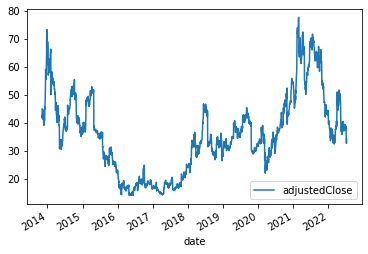

In [11]:
print(df_AdjustedClose.info())
df_AdjustedClose.plot()

In [12]:
# Add EMA to dataframe by appending
# Note: pandas_ta integrates seamlessly into
# our existing dataframe
df_AdjustedClose.ta.ema(close='adjustedClose', length=10, append=True)

C:\Users\15125\AppData\Local\Temp/ipykernel_7300/668832598.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AdjustedClose.ta.ema(close='adjustedClose', length=10, append=True)


date
2013-11-07          NaN
2013-11-08          NaN
2013-11-11          NaN
2013-11-12          NaN
2013-11-13          NaN
                ...    
2022-07-06    38.322350
2022-07-07    38.407378
2022-07-08    38.116946
2022-07-11    37.122956
2022-07-12    36.566055
Name: EMA_10, Length: 2183, dtype: float64

In [13]:
# Print the first 20 entries of our data
df_AdjustedClose.head(20)

,adjustedClose,EMA_10
date,,
2013-11-07,44.900002,NaN
2013-11-08,41.650002,NaN
2013-11-11,42.900002,NaN
2013-11-12,41.900002,NaN
2013-11-13,42.599998,NaN
2013-11-14,44.689999,NaN
2013-11-15,43.980000,NaN
2013-11-18,41.139999,NaN
2013-11-19,41.750000,NaN


In [14]:
# Drop the first n-rows
df_AdjustedClose.dropna(inplace=True)
# View our newly-formed dataset
df_AdjustedClose.head(10)

C:\Users\15125\AppData\Local\Temp/ipykernel_7300/1199575657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AdjustedClose.dropna(inplace=True)


,adjustedClose,EMA_10
date,,
2013-11-20,41.049999,42.656000
2013-11-21,42.060001,42.547637
2013-11-22,41.000000,42.266248
2013-11-25,39.060001,41.683294
2013-11-26,40.180000,41.409968
2013-11-27,40.900002,41.317247
2013-11-29,41.570000,41.363202
2013-12-02,40.779999,41.257165
2013-12-03,41.369999,41.277680


<AxesSubplot:xlabel='date'>

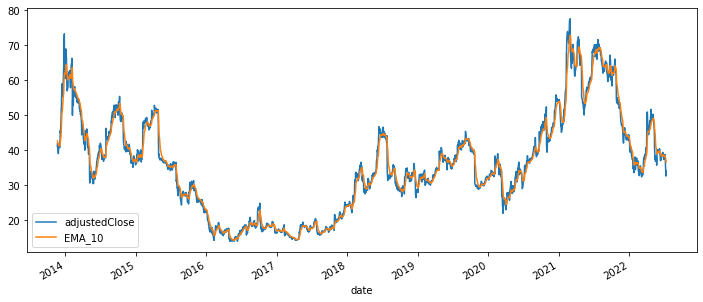

In [15]:
df_AdjustedClose.plot(figsize=(12,5))

In [16]:
 from sklearn.model_selection import train_test_split

In [17]:
# Split data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(df_AdjustedClose[['adjustedClose']], df_AdjustedClose[['EMA_10']], test_size=.3)
# Test set
print(X_test.describe())

       adjustedClose
count     653.000000
mean       36.040812
std        14.825376
min        14.010000
25%        24.690001
50%        34.630001
75%        44.599998
max        74.589996


In [18]:
# Training set
print(X_train.describe())

       adjustedClose
count    1521.000000
mean       35.568823
std        14.008454
min        14.020000
25%        24.920000
50%        34.849998
75%        43.669998
max        77.629997


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Create Regression Model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Use model to make predictions
y_pred = model.predict(X_test)

In [20]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Printout relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))
print("Intercept:", model.intercept_)


Model Coefficients: [[0.9822706]]
Mean Absolute Error: 1.2542156488710325
Coefficient of Determination: 0.9835260012965489
Intercept: [0.63810545]


MAE, RMSE, MAPE

In [21]:
import math
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
mae=mean_absolute_error(y_test,y_pred)
mae

mape =mean_absolute_percentage_error(y_test,y_pred)
mape

rmse = math.sqrt(mean_squared_error(y_test,y_pred))
rmse 

1.8718511411070287

In [22]:
print(selected_value)
print("--------------")
print("MAE :" + str(mae) )
print("MAPE :" + str(mape) )
print("RMSE :" + str(rmse) )

twitter
--------------
MAE :1.2542156488710325
MAPE :0.03505793820945648
RMSE :1.8718511411070287


In [23]:
dfpred = pd.DataFrame(y_pred)
dfpred.columns=["y_pred"]
dfpred

,y_pred
0,27.827356
1,28.289023
2,63.631116
3,17.179542
4,63.768634
...,...
648,37.031230
649,30.489308
650,40.979959
651,38.396586


In [24]:
y_test

,EMA_10
date,
2020-05-06,28.228100
2015-10-05,26.525816
2021-08-23,64.067197
2017-07-27,19.191564
2021-03-23,67.015798
...,...
2014-07-18,37.995778
2018-09-13,31.607342
2020-08-28,39.832879


In [25]:
df_trend = y_test.copy()
df_trend["y_pred"]=y_pred
df_trend

,EMA_10,y_pred
date,,
2020-05-06,28.228100,27.827356
2015-10-05,26.525816,28.289023
2021-08-23,64.067197,63.631116
2017-07-27,19.191564,17.179542
2021-03-23,67.015798,63.768634
...,...,...
2014-07-18,37.995778,37.031230
2018-09-13,31.607342,30.489308
2020-08-28,39.832879,40.979959


<AxesSubplot:xlabel='date'>

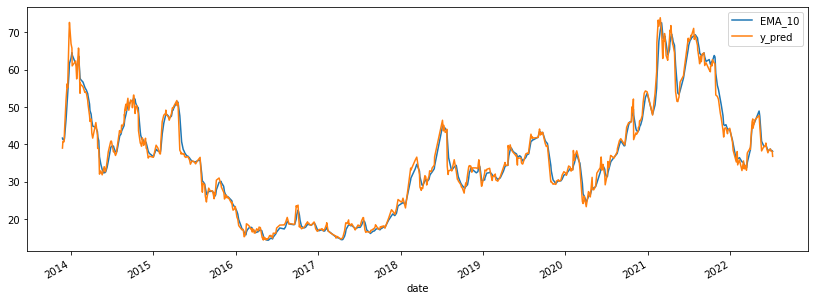

In [26]:
df_trend.plot(figsize=(14,5))

In [27]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=0).fit(X_train, y_train)
print(model.score(X_train, y_train))

print(model.score(X_test, y_test))

C:\Users\15125\AppData\Local\Temp/ipykernel_7300/3969865832.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestRegressor(random_state=0).fit(X_train, y_train)


0.994708536087065
0.9785965821781278


In [28]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,accuracy_score
# Printout relevant metrics
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))
# print("Accuracy",accuracy_score(y_test,y_pred)) - not supported for continous data


Mean Absolute Error: 1.2542156488710325
Coefficient of Determination: 0.9835260012965489


In [29]:
# Coefficient of Determination: 0.9925133513467957 close to 1, means the model is nearly perfectly fit
# Mean Absolute Error: 16.136803174699697 this value is high should be close to 0 for a best prediction
# Model Cofficients :[[0.99243097]] - X and Y are closely related -moving avergae does not have deviation from the actual values


In [30]:
predictions_reg = model.predict(X_test)
predictions_reg

array([27.3370057 , 29.30035656, 63.83802343, 17.17051235, 63.25774088,
       36.68231676, 34.49709951, 14.92840742, 16.79973688, 17.80723599,
       46.34052566, 32.22811914, 38.12501573, 66.09020454, 36.30260381,
       44.09129803, 22.37802067, 36.16860548, 17.20642264, 42.90045816,
       41.91568777, 31.82734412, 44.05910741, 15.22933124, 43.80523932,
       33.11339023, 37.78181189, 50.02443593, 16.90608178, 37.94748526,
       19.86651038, 67.81156565, 32.21227967, 61.98638214, 18.04880064,
       18.33025368, 16.27488505, 19.48316414, 18.32347404, 39.31210809,
       28.80286472, 55.89885273, 17.05599565, 35.3079266 , 23.77336954,
       33.85195231, 32.30595862, 29.60179162, 17.35869432, 36.60601089,
       37.96182465, 18.75614161, 68.44163271, 41.93207287, 34.41837172,
       44.33328818, 37.36155925, 29.36864158, 68.00360654, 20.64094355,
       48.28889323, 18.57597404, 32.41228094, 42.74592216, 55.49320722,
       39.11105317, 26.72383165, 35.0534508 , 31.98665932, 65.54

In [31]:
dfpred_reg = pd.DataFrame(predictions_reg)
dfpred_reg.columns=["y_pred"]
dfpred_reg

,y_pred
0,27.337006
1,29.300357
2,63.838023
3,17.170512
4,63.257741
...,...
648,37.737681
649,31.508434
650,40.129100
651,36.427950


In [32]:
df_reg = y_test.copy()
df_reg["y_pred"]=y_pred
df_reg

,EMA_10,y_pred
date,,
2020-05-06,28.228100,27.827356
2015-10-05,26.525816,28.289023
2021-08-23,64.067197,63.631116
2017-07-27,19.191564,17.179542
2021-03-23,67.015798,63.768634
...,...,...
2014-07-18,37.995778,37.031230
2018-09-13,31.607342,30.489308
2020-08-28,39.832879,40.979959


<AxesSubplot:xlabel='date'>

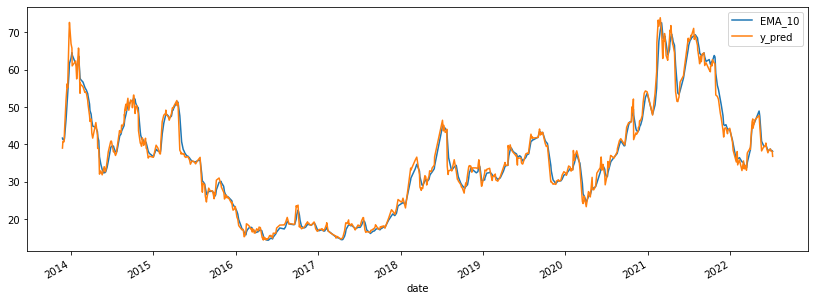

In [33]:
df_reg.plot(figsize=(14,5))

In [34]:
import string
#df_AdjustedClose["adjustedClose"][-1]
pred_last_value = df_trend.loc[df_trend.index == pd.to_datetime(df_trend.index.max())]["y_pred"]
df_forecast=[]
i=0
for i in range(0,100):
    if i == 0:

        df_forecast.append(0.96873381* df_AdjustedClose["adjustedClose"][-1] + 0.00158298)
        #df_forecast.append(model.predict(df_AdjustedClose["adjustedClose"][-1].reshape(-1,1)))
    else:
        #df_forecast.append(model.predict(df_forecast[i-1]))
        df_forecast.append(0.97316976*df_forecast[i-1]  + 0.00152851)
    i = i + 1    
print(df_forecast)

df_forecast = pd.DataFrame(df_forecast)

[32.996657517333816, 32.112877786945944, 31.252810078831516, 30.415818193742048, 29.601283001807584, 28.808601984561164, 28.037188789250912, 27.28647279511, 26.555898691263728, 25.844926065961435, 25.153029006829435, 24.47969571184924, 23.824428110773354, 23.18674149669856, 22.566164167524178, 21.962237077030103, 21.37451349531649, 20.802558678353908, 20.24594954639959, 19.704274371041798, 19.1771324706409, 18.66413391394181, 18.164899231638614, 17.679059135677935, 17.206254246093504, 16.746134825169797, 16.298360518738132, 15.862600104413863, 15.438531246588413, 15.025840257994947, 14.624221867671281, 14.233378995148412, 13.85302253069762, 13.482871121473595, 13.122650963395389, 12.772095598611259, 12.430945718397576, 12.098948971345996, 11.775859776697029, 11.4614391426819, 11.15545448973835, 10.857679478469592, 10.567893842219178, 10.285883224137915, 10.01143901862232, 9.744358217007319, 9.48444325739904, 9.231501878536642, 8.985346977575054, 8.745796471683441, 8.512673163357022, 8.

In [35]:
import datetime
end_date = pd.to_datetime('2022-06-20')

date_future = end_date + datetime.timedelta(139)

df_future_dates = pd.date_range(start=end_date, end=date_future,freq='B')
df_future_dates

DatetimeIndex(['2022-06-20', '2022-06-21', '2022-06-22', '2022-06-23',
               '2022-06-24', '2022-06-27', '2022-06-28', '2022-06-29',
               '2022-06-30', '2022-07-01', '2022-07-04', '2022-07-05',
               '2022-07-06', '2022-07-07', '2022-07-08', '2022-07-11',
               '2022-07-12', '2022-07-13', '2022-07-14', '2022-07-15',
               '2022-07-18', '2022-07-19', '2022-07-20', '2022-07-21',
               '2022-07-22', '2022-07-25', '2022-07-26', '2022-07-27',
               '2022-07-28', '2022-07-29', '2022-08-01', '2022-08-02',
               '2022-08-03', '2022-08-04', '2022-08-05', '2022-08-08',
               '2022-08-09', '2022-08-10', '2022-08-11', '2022-08-12',
               '2022-08-15', '2022-08-16', '2022-08-17', '2022-08-18',
               '2022-08-19', '2022-08-22', '2022-08-23', '2022-08-24',
               '2022-08-25', '2022-08-26', '2022-08-29', '2022-08-30',
               '2022-08-31', '2022-09-01', '2022-09-02', '2022-09-05',
      

In [36]:
df_combine = pd.DataFrame(df_future_dates,df_forecast[0])
df_combine.columns=['date']
df_combine

,date
0,
32.996658,2022-06-20
32.112878,2022-06-21
31.252810,2022-06-22
30.415818,2022-06-23
29.601283,2022-06-24
...,...
2.543747,2022-10-31
2.477027,2022-11-01
2.412096,2022-11-02


In [37]:
df_combine_forecast = df_combine.reset_index()
df_combine_forecast = df_combine_forecast.set_index('date')
df_combine_forecast

,0
date,
2022-06-20,32.996658
2022-06-21,32.112878
2022-06-22,31.252810
2022-06-23,30.415818
2022-06-24,29.601283
...,...
2022-10-31,2.543747
2022-11-01,2.477027
2022-11-02,2.412096


In [38]:
dfpred = pd.DataFrame(y_pred)
dfpred.columns=["y_pred"]
dfpred

,y_pred
0,27.827356
1,28.289023
2,63.631116
3,17.179542
4,63.768634
...,...
648,37.031230
649,30.489308
650,40.979959
651,38.396586


In [39]:
df_trend = y_test.copy()
df_trend["y_pred"]=y_pred
df_trend

,EMA_10,y_pred
date,,
2020-05-06,28.228100,27.827356
2015-10-05,26.525816,28.289023
2021-08-23,64.067197,63.631116
2017-07-27,19.191564,17.179542
2021-03-23,67.015798,63.768634
...,...,...
2014-07-18,37.995778,37.031230
2018-09-13,31.607342,30.489308
2020-08-28,39.832879,40.979959


<Figure size 1152x576 with 0 Axes>

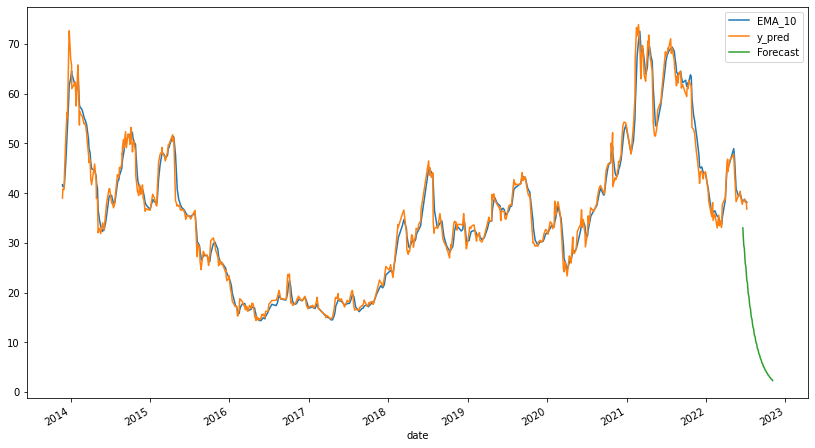

In [40]:
#plot the predictions for validation set
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
df_trend.plot(figsize=(14,8))
#plt.plot(df_trend)
#plt.plot(valid, label='Valid')

plt.plot(df_combine_forecast[0], label='Forecast')
plt.legend()
plt.show()